<div style="background-color:navy;color:white;padding:30px;font-size:180%">Data analysis on Global Findex: Mobile Money Account</div>

<img src='maps.png' width=500px height=100px alt='global' >

**Group 5:**
- **Thuong Nguyen (Analyst)**
- Shree Sapkota (Commentor)
- Sandip Pandey (Commentor)


# Our Purposes of Analysis

 - Experience on real life data which often requests work on cleaning and tidy up data.
 - Understand the complex nature of real life data. For example: attributes are often not easy to directly understand.
 - Make sense of why drop data and why not.
 - Make analysis and EDA.

# About Dataset
The Global Findex database is the world’s most comprehensive data set on how adults save, borrow, make payments, and manage risk. 
<br>
Launched with funding from the Bill & Melinda Gates Foundation, the database has been published every three years since 2011. The data are collected in partnership with Gallup, Inc., through nationally representative surveys of more than 150,000 adults in over 140 economies. 
<br>
The 2017 edition includes updated indicators on access to and use of formal and informal financial services. And it adds new data on the use of financial technology (fintech), including the use of mobile phones and the internet to conduct financial transactions.

<div style='background-color:#FCFBFC;padding:20px'> 
<b>Original dataset contains:</b>
<li> Section 1:  how people across the world use financial institutions and how available they are to people: FIN1 to FIN1)</li>
<li> Section 2: unbank, people without bank account: FIN11 </li>
<li style='color:#A712A7'>Section 3: mobile/internet section FIN12 to FIN 14. (target extract)</li>
<li>Section 4: saving section FIN15 to FIN18</li>
<li> Section 5: borrowing section: FIN19-25</li>
...
<li style='color:#A712A7'>end section: FIN48 about ID identity (target extract)</li>

Link with the Series table in the excel data file to understand how attributes are organized in the data file.
   </div>

<b>Useful links:</b>
- Survey form: https://globalfindex.worldbank.org/sites/globalfindex/files/databank/2017%20Findex%20questionnaire.pdf
- Termilogogy glossary: https://globalfindex.worldbank.org/sites/globalfindex/files/databank/Glossary2017.pdf
- Main page: https://globalfindex.worldbank.org/

# Catch and load original dataset

## Import necessary libraries/packages

In [1]:
# importing libraries
import plotly.graph_objects as go
import chart_studio.plotly as py
import cufflinks as cf
from plotly.offline import iplot, init_notebook_mode
#--------------------------------------------#

import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
# option for pandas to display the columns
pd.options.display.max_columns=30

# setting the notebook mode for plotly

init_notebook_mode(connected=True)
cf.go_offline(connected=True)

# setting theme in cufflinks

cf.set_config_file(theme="pearl")

# set display print
pd.options.display.float_format = '{:,.2f}'.format

## Catch and load data with url

In [2]:
url='https://globalfindex.worldbank.org/sites/globalfindex/files/2018-08/Global%20Findex%20Database.xlsx'

In [3]:
data=pd.read_excel(url,'Data')

## Investigate data

In [4]:
data.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Account (% age 15+),"Account, male (% age 15+)","Account, in labor force (% age 15+)","Account, out of labor force (% age 15+)","Account, female (% age 15+)","Account, young adults (% ages 15-24)","Account, older adults (% ages 25+)","Account, primary education or less (% ages 15+)","Account, secondary education or more (% ages 15+)","Account, income, poorest 40% (% ages 15+)",...,"Received digital payments in the past year, income, poorest 40% (% age 15+)","Received digital payments in the past year, income, richest 60% (% age 15+)","Received digital payments in the past year, rural (% age 15+)",Mobile money account (% age 15+),"Mobile money account, male (% age 15+)","Mobile money account, in labor force (% age 15+)","Mobile money account, out of labor force (% age 15+)","Mobile money account, female (% age 15+)","Mobile money account, young adults (% age 15-24)","Mobile money account, older adults (% age 25+)","Mobile money account, primary education or less (% age 15+)","Mobile money account, secondary education or less (% age 15+)","Mobile money account, income, poorest 40% (% age 15+)","Mobile money account, income, richest 60% (% age 15+)","Mobile money account, rural (% age 15+)"
0,2011,AFG,Afghanistan,South Asia,Low income,0.09,0.15,0.15,0.02,0.03,0.06,0.11,0.05,0.30,0.01,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1,2014,AFG,Afghanistan,South Asia,Low income,0.10,0.16,0.15,0.04,0.04,0.07,0.12,0.05,0.23,0.06,...,0.02,0.06,0.04,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00
2,2017,AFG,Afghanistan,South Asia,Low income,0.15,0.23,0.25,0.04,0.07,0.10,0.18,0.09,0.31,0.14,...,0.08,0.10,0.09,0.01,0.01,0.02,0.00,0.01,0.00,0.01,0.00,0.02,0.00,0.01,0.01
3,2011,AGO,Angola,Sub-Saharan Africa (excluding high income),Lower middle income,0.39,0.39,0.46,0.31,0.39,0.30,0.45,0.35,0.44,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
4,2014,AGO,Angola,Sub-Saharan Africa (excluding high income),Lower middle income,0.29,0.36,0.36,0.12,0.22,0.15,0.38,0.14,0.70,0.13,...,0.06,0.23,0.11,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [5]:
data.shape
#huge amount of columns!!!

(494, 781)

## Pre-processing (rename necessary columns)

In [6]:
data.rename({'Unnamed: 0':'Year','Unnamed: 2':'Country','Unnamed: 1':'ISO','Unnamed: 3':'Region'},axis='columns', inplace=True)

In [7]:
data.head()

,Year,ISO,Country,Region,Unnamed: 4,Account (% age 15+),"Account, male (% age 15+)","Account, in labor force (% age 15+)","Account, out of labor force (% age 15+)","Account, female (% age 15+)","Account, young adults (% ages 15-24)","Account, older adults (% ages 25+)","Account, primary education or less (% ages 15+)","Account, secondary education or more (% ages 15+)","Account, income, poorest 40% (% ages 15+)",...,"Received digital payments in the past year, income, poorest 40% (% age 15+)","Received digital payments in the past year, income, richest 60% (% age 15+)","Received digital payments in the past year, rural (% age 15+)",Mobile money account (% age 15+),"Mobile money account, male (% age 15+)","Mobile money account, in labor force (% age 15+)","Mobile money account, out of labor force (% age 15+)","Mobile money account, female (% age 15+)","Mobile money account, young adults (% age 15-24)","Mobile money account, older adults (% age 25+)","Mobile money account, primary education or less (% age 15+)","Mobile money account, secondary education or less (% age 15+)","Mobile money account, income, poorest 40% (% age 15+)","Mobile money account, income, richest 60% (% age 15+)","Mobile money account, rural (% age 15+)"
0,2011,AFG,Afghanistan,South Asia,Low income,0.09,0.15,0.15,0.02,0.03,0.06,0.11,0.05,0.30,0.01,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1,2014,AFG,Afghanistan,South Asia,Low income,0.10,0.16,0.15,0.04,0.04,0.07,0.12,0.05,0.23,0.06,...,0.02,0.06,0.04,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00
2,2017,AFG,Afghanistan,South Asia,Low income,0.15,0.23,0.25,0.04,0.07,0.10,0.18,0.09,0.31,0.14,...,0.08,0.10,0.09,0.01,0.01,0.02,0.00,0.01,0.00,0.01,0.00,0.02,0.00,0.01,0.01
3,2011,AGO,Angola,Sub-Saharan Africa (excluding high income),Lower middle income,0.39,0.39,0.46,0.31,0.39,0.30,0.45,0.35,0.44,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
4,2014,AGO,Angola,Sub-Saharan Africa (excluding high income),Lower middle income,0.29,0.36,0.36,0.12,0.22,0.15,0.38,0.14,0.70,0.13,...,0.06,0.23,0.11,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


# Extract necessary data:

<img src='mobilepay.jpg' width=1000px height=100px object-fit='fill' alt='mobile pay' >

<mark>According to Findex:
" Mobile money account includes respondents who report personally using services
included in the GSM Association’s Mobile Money for the Unbanked (GSMA MMU)
database to pay bills or to send or receive money in the past 12 months. It also includes
an additional 0.60 percent of respondents in 2017 who report receiving wages, government transfers, a public sector pension (included in 2017 data), or payments for agricultural products through a mobile phone in the past 12 months."

<b> Because the dataset is too big to cover. We only focus on a group of variable that start with Mobile (notice: all respondents of the survey are adults.<b>

## Use regex to extract from pandas dataframe

In [8]:
# extract to take variables to analyse on Mobile users in handling with finance.
# We can see Year and country to index but since they are not unique variables---> should not set them as indice
mob_1=data[data.columns[data.columns.str.contains(r'Mobile')]]


<mark> Attributes are defined according to Findex:
- __Mobile money account (% age 15+)__: The percentage of respondents who report personally using a mobile money service in the past 12 months
- __Mobile money account, male  (% age 15+)__ The percentage of respondents who report personally using a mobile money service in the past 12 months, male (% age 15+).
- __Mobile money account, in labor force (% age 15+)__ The percentage of respondents who report personally using a mobile money service in the past 12 months, in labor force  (% age 15+)
- __Mobile money account, out of labor force (% age 15+)__  The percentage of respondents who report personally using a mobile money service in the past 12 months, out of labor force  (% age 15+)
- __Mobile money account, female (% age 15+)__ 	The percentage of respondents who report personally using a mobile money service in the past 12 months, female (% age 15+)
- __Mobile money account, young adults  (% age 15-24)__ 	The percentage of respondents who report personally using a mobile money service in the past 12 months, young adults (% age 15-24)
- __Mobile money account, older adults (% age 25+)__ The percentage of respondents who report personally using a mobile money service in the past 12 months, older adults (% age 25+)
- __Mobile money account, primary education or less (% age 15+)__	The percentage of respondents who report personally using a mobile money service in the past 12 months, primary education or less (% age 15+)
- __Mobile money account, secondary education or less (% age 15+)__ 	The percentage of respondents who report personally using a mobile money service in the past 12 months, secondary education or more (% age 15+)
- __Mobile money account, income, poorest 40% (% age 15+)__ 	The percentage of respondents who report personally using a mobile money service in the past 12 months, income, poorest 40% (% age 15+)
- __Mobile money account, income, richest 60%  (% age 15+)__ 	The percentage of respondents who report personally using a mobile money service in the past 12 months, income, richest 50% (% age 15+)
- __Mobile money account, rural  (% age 15+)__ 	The percentage of respondents who report personally using a mobile money service in the past 12 months, rural (% age 15+)


## Join 2 dataframes to have full Mobile Money Account dataset 

In [9]:
mob_2=data[['Year','Country','ISO','Region']]
mob=mob_2.join(mob_1)
mob

,Year,Country,ISO,Region,Mobile money account (% age 15+),"Mobile money account, male (% age 15+)","Mobile money account, in labor force (% age 15+)","Mobile money account, out of labor force (% age 15+)","Mobile money account, female (% age 15+)","Mobile money account, young adults (% age 15-24)","Mobile money account, older adults (% age 25+)","Mobile money account, primary education or less (% age 15+)","Mobile money account, secondary education or less (% age 15+)","Mobile money account, income, poorest 40% (% age 15+)","Mobile money account, income, richest 60% (% age 15+)","Mobile money account, rural (% age 15+)"
0,2011,Afghanistan,AFG,South Asia,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1,2014,Afghanistan,AFG,South Asia,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00
2,2017,Afghanistan,AFG,South Asia,0.01,0.01,0.02,0.00,0.01,0.00,0.01,0.00,0.02,0.00,0.01,0.01
3,2011,Angola,AGO,Sub-Saharan Africa (excluding high income),nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
4,2014,Angola,AGO,Sub-Saharan Africa (excluding high income),nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,2014,Zambia,ZMB,Sub-Saharan Africa (excluding high income),0.12,0.15,0.14,0.08,0.09,0.13,0.11,0.04,0.22,0.05,0.17,0.11
490,2017,Zambia,ZMB,Sub-Saharan Africa (excluding high income),0.28,0.30,0.32,0.19,0.26,0.29,0.27,0.15,0.41,0.19,0.34,0.26
491,2011,Zimbabwe,ZWE,Sub-Saharan Africa (excluding high income),nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
492,2014,Zimbabwe,ZWE,Sub-Saharan Africa (excluding high income),0.22,0.24,0.25,0.17,0.19,0.20,0.23,0.13,0.27,0.10,0.29,0.19


In [10]:
mob.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494 entries, 0 to 493
Data columns (total 16 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   Year                                                            494 non-null    int64  
 1   Country                                                         494 non-null    object 
 2   ISO                                                             494 non-null    object 
 3   Region                                                          430 non-null    object 
 4   Mobile money account (% age 15+)                                174 non-null    float64
 5   Mobile money account, male  (% age 15+)                         174 non-null    float64
 6   Mobile money account, in labor force (% age 15+)                173 non-null    float64
 7   Mobile money account, out of labor force (% age 15+) 

<div style='background-color:orange; color:white; padding:20px'> PREPARING DATA
</div>

## Clean missing value

In [11]:
mob_1=mob_1.dropna(how='any')
# now only 174 columns 
mob_1.head()

,Mobile money account (% age 15+),"Mobile money account, male (% age 15+)","Mobile money account, in labor force (% age 15+)","Mobile money account, out of labor force (% age 15+)","Mobile money account, female (% age 15+)","Mobile money account, young adults (% age 15-24)","Mobile money account, older adults (% age 25+)","Mobile money account, primary education or less (% age 15+)","Mobile money account, secondary education or less (% age 15+)","Mobile money account, income, poorest 40% (% age 15+)","Mobile money account, income, richest 60% (% age 15+)","Mobile money account, rural (% age 15+)"
1,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00
2,0.01,0.01,0.02,0.00,0.01,0.00,0.01,0.00,0.02,0.00,0.01,0.01
7,0.02,0.02,0.03,0.02,0.02,0.06,0.01,0.01,0.04,0.00,0.04,0.02
12,0.11,0.12,0.13,0.06,0.10,0.10,0.12,0.07,0.12,0.07,0.15,0.16
13,0.21,0.23,0.23,0.09,0.18,0.10,0.22,0.09,0.22,0.16,0.25,0.14


## Convert the unit value for easy readable percentage

In [12]:
mob_1=mob_1*100

## Join back to have the whole clean data

In [13]:
mob_cl=mob_2.join(mob_1,how='inner')  # join by matching index, only chose match
mob_cl

,Year,Country,ISO,Region,Mobile money account (% age 15+),"Mobile money account, male (% age 15+)","Mobile money account, in labor force (% age 15+)","Mobile money account, out of labor force (% age 15+)","Mobile money account, female (% age 15+)","Mobile money account, young adults (% age 15-24)","Mobile money account, older adults (% age 25+)","Mobile money account, primary education or less (% age 15+)","Mobile money account, secondary education or less (% age 15+)","Mobile money account, income, poorest 40% (% age 15+)","Mobile money account, income, richest 60% (% age 15+)","Mobile money account, rural (% age 15+)"
1,2014,Afghanistan,AFG,South Asia,0.30,0.40,0.57,0.00,0.21,0.26,0.33,0.29,0.35,0.00,0.51,0.24
2,2017,Afghanistan,AFG,South Asia,0.91,0.95,1.72,0.05,0.88,0.00,1.47,0.40,2.26,0.36,1.28,0.85
7,2017,Albania,ALB,Europe & Central Asia (excluding high income),2.38,2.38,3.07,1.69,2.38,5.98,1.32,0.80,4.37,0.49,3.63,1.85
12,2014,United Arab Emirates,ARE,High income,11.49,12.20,12.62,5.91,9.67,9.63,12.00,7.10,11.73,7.02,14.65,16.40
13,2017,United Arab Emirates,ARE,High income,21.33,22.52,22.96,9.46,18.19,10.12,22.34,9.29,21.86,15.59,25.15,13.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
487,2017,South Africa,ZAF,Sub-Saharan Africa (excluding high income),19.02,19.42,24.86,8.74,18.64,16.92,19.92,12.17,21.74,12.06,23.62,19.14
489,2014,Zambia,ZMB,Sub-Saharan Africa (excluding high income),12.11,14.85,13.77,8.44,9.48,13.24,11.38,3.94,21.71,5.48,16.53,11.31
490,2017,Zambia,ZMB,Sub-Saharan Africa (excluding high income),27.84,29.95,32.37,19.41,25.82,28.90,27.06,14.52,40.52,18.51,34.06,25.51
492,2014,Zimbabwe,ZWE,Sub-Saharan Africa (excluding high income),21.60,24.21,25.19,16.84,19.10,20.01,22.51,12.56,27.38,9.97,29.33,19.09


<div class="alert alert-block alert-success">
<b>Now we have clean data without missing value:</b> data frame name 'mob_cl' with information as shown above.
</div>

## Make columns name more concise and human readable:
- we can remove redundance <mark>'Mobile money account'</mark>, because all this part is about Mobile already
- we also see redundance and later become confusing with '()', so we decide to drop the text part in <mark>()</mark> of each columns name.
- to keep understanding, we notice before deleting:
  - young aldults are age 15-24, old aldult are 25+, the rest columns are just 15+
  - figure are ratio of confirmed using mobile. (1 means 100%)

In [14]:
mob_cl.columns=mob_cl.columns.str.replace(r'(Mobile\smoney\saccount\,?\s)','')

In [15]:
mob_cl.columns=mob_cl.columns.str.replace(r'\(.+\)','').str.strip().str.title()

In [16]:
mob_cl.head()

,Year,Country,Iso,Region,,Male,In Labor Force,Out Of Labor Force,Female,Young Adults,Older Adults,Primary Education Or Less,Secondary Education Or Less,"Income, Poorest 40%","Income, Richest 60%",Rural
1,2014,Afghanistan,AFG,South Asia,0.30,0.40,0.57,0.00,0.21,0.26,0.33,0.29,0.35,0.00,0.51,0.24
2,2017,Afghanistan,AFG,South Asia,0.91,0.95,1.72,0.05,0.88,0.00,1.47,0.40,2.26,0.36,1.28,0.85
7,2017,Albania,ALB,Europe & Central Asia (excluding high income),2.38,2.38,3.07,1.69,2.38,5.98,1.32,0.80,4.37,0.49,3.63,1.85
12,2014,United Arab Emirates,ARE,High income,11.49,12.20,12.62,5.91,9.67,9.63,12.00,7.10,11.73,7.02,14.65,16.40
13,2017,United Arab Emirates,ARE,High income,21.33,22.52,22.96,9.46,18.19,10.12,22.34,9.29,21.86,15.59,25.15,13.67


In [17]:
# one column with empty space, which is General value represent for percentage of adults having Mobile Money Account:
mob_cl.rename({'':'General'}, axis='columns',inplace=True)
mob_cl

,Year,Country,Iso,Region,General,Male,In Labor Force,Out Of Labor Force,Female,Young Adults,Older Adults,Primary Education Or Less,Secondary Education Or Less,"Income, Poorest 40%","Income, Richest 60%",Rural
1,2014,Afghanistan,AFG,South Asia,0.30,0.40,0.57,0.00,0.21,0.26,0.33,0.29,0.35,0.00,0.51,0.24
2,2017,Afghanistan,AFG,South Asia,0.91,0.95,1.72,0.05,0.88,0.00,1.47,0.40,2.26,0.36,1.28,0.85
7,2017,Albania,ALB,Europe & Central Asia (excluding high income),2.38,2.38,3.07,1.69,2.38,5.98,1.32,0.80,4.37,0.49,3.63,1.85
12,2014,United Arab Emirates,ARE,High income,11.49,12.20,12.62,5.91,9.67,9.63,12.00,7.10,11.73,7.02,14.65,16.40
13,2017,United Arab Emirates,ARE,High income,21.33,22.52,22.96,9.46,18.19,10.12,22.34,9.29,21.86,15.59,25.15,13.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
487,2017,South Africa,ZAF,Sub-Saharan Africa (excluding high income),19.02,19.42,24.86,8.74,18.64,16.92,19.92,12.17,21.74,12.06,23.62,19.14
489,2014,Zambia,ZMB,Sub-Saharan Africa (excluding high income),12.11,14.85,13.77,8.44,9.48,13.24,11.38,3.94,21.71,5.48,16.53,11.31
490,2017,Zambia,ZMB,Sub-Saharan Africa (excluding high income),27.84,29.95,32.37,19.41,25.82,28.90,27.06,14.52,40.52,18.51,34.06,25.51
492,2014,Zimbabwe,ZWE,Sub-Saharan Africa (excluding high income),21.60,24.21,25.19,16.84,19.10,20.01,22.51,12.56,27.38,9.97,29.33,19.09


<div class="alert alert-block alert-info">
<b>Now we have clean final:</b> data frame name 'mob_cl' with information as shown above.
</div>

<div class="alert alert-block alert-danger"> The original data shows much more countries and 3 years, but the actual clean data to be used contains 96 countries in 2 years: 2014,2017
</div>

In [18]:
mob_cl.Year.unique()

array([2014, 2017], dtype=int64)

In [19]:
mob_cl.Country.unique().shape

(96,)

## Tidying Data and analysis

We can see that both columns labels and Year, and Country are not meaningful as value to calculate, but they are meaningful as labels.


In [20]:
mob_cl0=mob_cl.drop(['Iso','Region'],axis=1)

In [21]:
mob_cl1=pd.melt(mob_cl0,id_vars=['Year','Country'],var_name='group')

In [22]:
mob_cl1.head()

,Year,Country,group,value
0,2014,Afghanistan,General,0.30
1,2017,Afghanistan,General,0.91
2,2017,Albania,General,2.38
3,2014,United Arab Emirates,General,11.49
4,2017,United Arab Emirates,General,21.33


<div style='background-color:orange; color:white; padding:20px'> ANALYSIS
</div>

## Analysis on percentage people used Mobile Money Account globally, and by groups of users 

In [23]:
d1=mob_cl1.groupby(['group'])['value'].describe()
d1.iplot(kind='line',y=['mean','max','min'], title='Global User Group',
         vline=dict(x='General', color='red', dash='dash')
        )

<div style='background-color:navy; color:white; padding:20px'>
Global: 
    <li> max >72% people use Mobile Money, however there is some country in the world that report of no Moble Money Account.</li>
    <li>The mean value 9.96% theorectically represents for the whole world situation which is supprising low at that time (2014,2017).</li>
</div>

<div style='background-color:navy; color:white; padding:20px'>
 By groups:
    <li>The group <b>secondary education or less</b> has highest percentage of Mobile Money Account basing on mean value 14.40%, and max value 83.89%. </li>
    <li>The group out of labor force has lowest percentage of Mobile Money Account.</li>
 <li>The same pattern can be observed for all groups: Orange line (for mean value) is closer to green line(min values).The below plotbox graph will clarify further this point.
    </div>

In [24]:
import plotly.express as px
fig=px.box(mob_cl1,x='group',y='value')
fig.show()

<div style='background-color:navy; color:white; padding:20px'>
Each data point is measure at one country one year: same pattern for each group: at percentige 75%, value fall under 21,2% ===>at some points, percentage of Mobile Money Account using can be high, but majority (75%) of countries in year 2014,2017 has percentage falls under 21,2%.
</div>

## Pair comparision: Genders, age groups, income groups, in vs out labor force

In [25]:
d2=d1['mean']

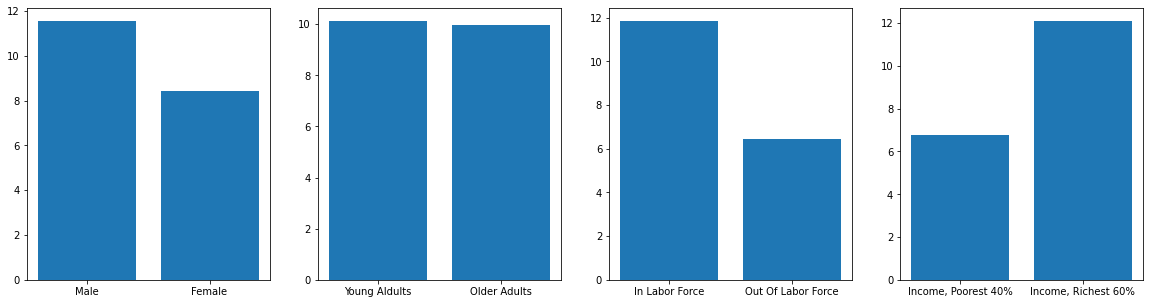

In [26]:
fig=plt.figure(figsize=(20,5))
a1=fig.add_subplot(1,4,1)
a2=fig.add_subplot(1,4,2)
a3=fig.add_subplot(1,4,3)
a4=fig.add_subplot(1,4,4)

a1.bar(['Male','Female'],height=d2[['Male','Female']])
a2.bar(['Young Aldults','Older Adults'],height=d2[['Young Adults','Older Adults']])
a3.bar(['In Labor Force','Out Of Labor Force'],height=d2[['In Labor Force','Out Of Labor Force']])
a4.bar(['Income, Poorest 40%','Income, Richest 60%'],height=d2[['Income, Poorest 40%','Income, Richest 60%']])

plt.show()
#ax2=d2[['Young Adults','Older Adults']].plot(kind='bar')

<div style='background-color:navy; color:white; padding:20px'> There is not much different between age group (probably because of how age group is divided), a slight difference between gender and clearly difference in the rest 2 pairs.
</div>

## Compare groups between year 2014 vs 2017

In [27]:
da=mob_cl1.groupby(['Year','group']).mean().reset_index()
da.Year=da.Year.astype(str)

In [28]:
da.iplot(x='group',y='value',categories='Year',mode='lines')

C:\Users\Sophia\anaconda3\lib\site-packages\cufflinks\plotlytools.py:807: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead

C:\Users\Sophia\anaconda3\lib\site-packages\cufflinks\plotlytools.py:810: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead



<div style='background-color:navy; color:white; padding:20px'>
Percentage of people having Mobile Money Account witness a substential increase from 2014 to 2017 in all groups.
</div>

## Tidying & analysis by country in year 2017

In [29]:
data_2017=mob_cl.query('Year==2017').drop('Year',axis=1)
geo=data_2017.iloc[:,:4].dropna()

In [30]:
geo

,Country,Iso,Region,General
2,Afghanistan,AFG,South Asia,0.91
7,Albania,ALB,Europe & Central Asia (excluding high income),2.38
13,United Arab Emirates,ARE,High income,21.33
16,Argentina,ARG,Latin America & Caribbean (excluding high income),2.42
19,Armenia,ARM,Europe & Central Asia (excluding high income),9.76
...,...,...,...,...
473,"Venezuela, RB",VEN,Latin America & Caribbean (excluding high income),10.97
476,Vietnam,VNM,East Asia & Pacific (excluding high income),3.50
487,South Africa,ZAF,Sub-Saharan Africa (excluding high income),19.02
490,Zambia,ZMB,Sub-Saharan Africa (excluding high income),27.84


In [31]:
fig = px.scatter_geo(geo, locations="Iso", color="Region",
                     hover_name="Country", size="General",
                    projection="natural earth",width=1000,height=500
            )


fig.show()

<div style='background-color:navy; color:white; padding:20px'> A through back in 2017, Mobile Money Account was actively use in Africa compared to other continents. We also noticed that data in Europe and North America was missing in year 2017. Indeed, Mckinsey report goes inline with our finding: "https://www.mckinsey.com/industries/financial-services/our-insights/mobile-financial-services-in-africa-winning-the-battle-for-the-customer#" 
</div>

In [32]:
geo.iplot(x='Country',y='General')

<div style='background-color:navy; color:white; padding:20px'>
Kenya set a leading position in Mobile Money Account year 2017. Technology develops rapidly, past history can be quite a surprise. See article Harvard Business School review as below:
 </div>

In [33]:
%%html
<iframe src=" https://digital.hbs.edu/platform-rctom/submission/how-kenya-created-the-worlds-most-successful-mobile-payments-service/" width="1000" height="500"></iframe>